In [1]:
import sys
from statistics import mean, stdev, variance
import numpy as np
import pandas as pd
from re import sub
import math
import operator

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
COLS_TO_USE = range(1,11)
IGNORE_ZEROS = True

In [3]:
def outName(x):
    return sub(r'(\w+).(\w+)',r'\1_output.\2',x)

def skipZero(alist):
    return [x for x in alist if (x>0)]

def skipZeroMean(l):
    l = skipZero(l)
    if len(l)==0: return 0
    return mean(skipZero((l)))

In [4]:
def get_thresholds(alist):
    alist = sorted(alist, reverse=True)
    print("Including Zeros: ")
    print("95% threshold: ", float(alist[math.ceil(float(len(alist))*.05)]))
    print("99% threshold: ", float(alist[math.ceil(float(len(alist))*.01)]))

    alist = [x for x in alist if (x>0)]
    print("\nIgnoring Zeros: ")
    ninety_five = float(alist[math.ceil(float(len(alist))*.05)])
    print("95% threshold: ", ninety_five)
    print("99% threshold: ", float(alist[math.ceil(float(len(alist))*.01)]))
    return ninety_five

In [5]:
def compare(selfseries, otherseries):
    c_dist = 0.0 #cumulative differences between the two series
    for i in range(0,len(selfseries)):
        c_dist += abs(float(selfseries[i])-float(otherseries[i]))
    ave_dist = float(c_dist)/float((len(selfseries)))
    return ave_dist

In [6]:
def get_lower(series, to_show=5):
    orser = series.sort_values(inplace=False)
    print (orser.iloc[range(0,to_show)], '\n\n')

In [7]:
def readin(fileName):
    inFile = open(fileName, 'r')
    
    line = inFile.readline()
    headings = line.split('\t')
       
    data = {}
    line = inFile.readline()
    while line !="":
        row = line.split('\t')
        vals = row[1:]
        for i in vals: i = float(i)
        data[(row[0])] = vals
        line = inFile.readline()
        
    df = pd.DataFrame.from_dict(data, dtype = float, orient='index',columns = headings[1:])
    return df


def readin_log(fileName):
    df = readin(fileName)
    dfl = (np.log(df)).replace(-np.inf, 0)
    return dfl

In [8]:
ms3data = readin("proteinGroups_MS3_simplified.txt")

In [9]:
samples = ms3data.iloc[:,[0,1,2,3,4,5,6,8,9]].values.flatten()
print (1 - len(skipZero(samples))/len(samples))
samples= skipZero(np.sort(samples))

thres5 = float(samples[math.ceil(float(len(samples))*.34)])
thres = [thres5]
thres.append(float(samples[math.ceil(float(len(samples))*.04)]))
thres.append(float(samples[math.ceil(float(len(samples))*.03)]))
thres.append(float(samples[math.ceil(float(len(samples))*.02)]))
thres.append(float(samples[math.ceil(float(len(samples))*.01)]))
print("5% threshold of non-negcontrol: ", thres5)

print(thres)

0.27437325905292476
5% threshold of non-negcontrol:  1365.9
[1365.9, 308.72, 290.45, 270.96, 249.91]


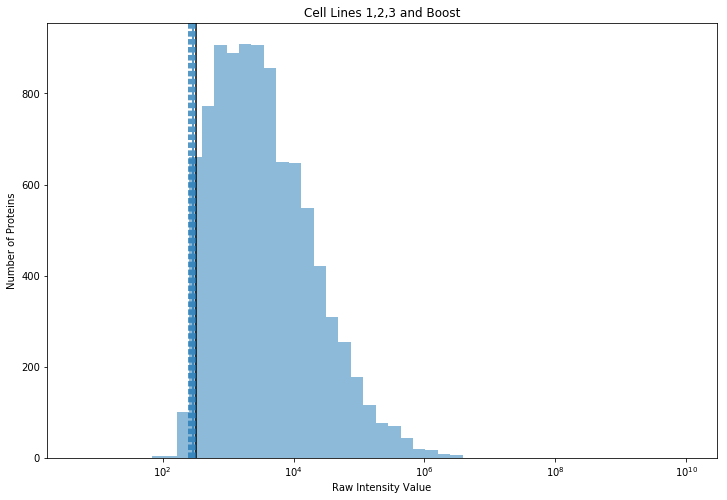

In [10]:
fig = plt.figure(figsize=(12,8))
plt.xscale('log')
plt.hist(samples, alpha=.5,bins=np.logspace(np.log10(5), 10))
plt.title("Cell Lines 1,2,3 and Boost")
plt.axvline(x= float(samples[math.ceil(float(len(samples))*.03)]), linestyle='-')
plt.axvline(x= float(samples[math.ceil(float(len(samples))*.05)]), linestyle='-', color="black")

plt.axvline(x= float(samples[math.ceil(float(len(samples))*.01)]), linestyle='dashed')
plt.axvline(x= float(samples[math.ceil(float(len(samples))*.02)]), linestyle='dashed')
plt.axvline(x= float(samples[math.ceil(float(len(samples))*.04)]), linestyle='dashed')

plt.xlabel("Raw Intensity Value")
plt.ylabel("Number of Proteins")
fig.savefig('CellLines123andBoost.png', dpi=300)
plt.show()

Non-zeros in control: 370
	Or 25.766%
Above the 5% threshold there are 7 negative control points.


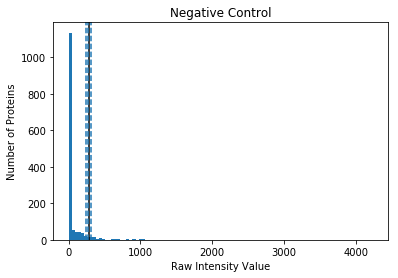

In [11]:
neg_cont = ms3data.iloc[:,7]
print ("Non-zeros in control:", len(skipZero(neg_cont)))
print ('\tOr {0:.3f}%'.format(len(skipZero(neg_cont))/len(neg_cont)*100.0))

control_thres5 = len([x for x in neg_cont if x > thres5])
print ("Above the 5% threshold there are {0} negative control points.".format(control_thres5))

if False:            
    print ("Above 5%",    (len([x for x in neg_cont if x > thres5]))),
    print ("Above 4%", len([x for x in neg_cont if x > thres[1]]))#/len(neg_cont)),
    print ("Above 3%", len([x for x in neg_cont if x > thres[2]]))#/len(neg_cont)),
    print ("Above 2%", len([x for x in neg_cont if x > thres[3]]))#/len(neg_cont)),
    print ("Above 1%", len([x for x in neg_cont if x > thres[4]]))#/len(neg_cont))

fig = plt.figure(figsize=(6,4))
plt.hist(neg_cont, bins = 100)
#sns.rugplot(neg_cont, color="black")
plt.title("Negative Control")
plt.axvline(x= float(samples[math.ceil(float(len(samples))*.03)]), linestyle='-', color="black")
plt.axvline(x= float(samples[math.ceil(float(len(samples))*.01)]), linestyle='dashed')
plt.axvline(x= float(samples[math.ceil(float(len(samples))*.02)]), linestyle='dashed')
plt.axvline(x= float(samples[math.ceil(float(len(samples))*.04)]), linestyle='dashed')
plt.xlabel("Raw Intensity Value")
plt.ylabel("Number of Proteins")

fig.savefig('NegControl.png', dpi=300)
plt.show()


In [12]:
def above(per, neg_cont, samples):
    threshold = float(samples[math.ceil(float(len(samples))*per)])
    #print (threshold)
    count = len([x for x in neg_cont if x > threshold])
    #print ("Above {0}%".format(per*100.0), count, count/len(neg_cont))
    return count

blanks_above = {}
for i in range(0,27):
    p = (float(i)/100.0)
    blanks_above[p] = above(p, neg_cont, samples)


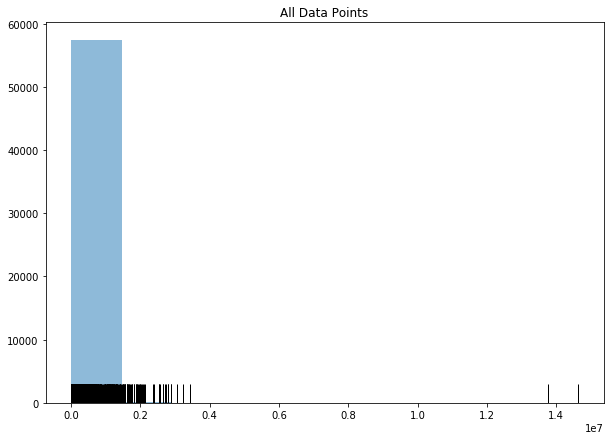

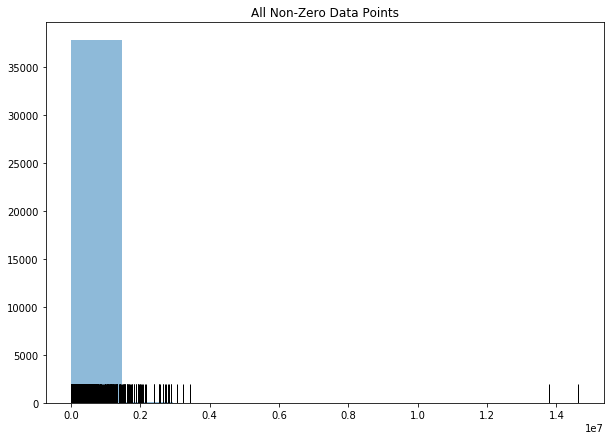

Note that 19596 zeros are not shown, out of a dataset of 57440.


In [13]:
plt.figure(figsize=(10,7))
plt.hist(ms3data.values.flatten(), alpha=.5)
sns.rugplot(ms3data.values.flatten(), color="black")
plt.title("All Data Points")
plt.show()

plt.figure(figsize=(10,7))
plt.hist(skipZero(ms3data.values.flatten()), alpha=.5)
sns.rugplot(skipZero(ms3data.values.flatten()), color="black")
plt.title("All Non-Zero Data Points")
plt.show()
print ("Note that %i zeros are not shown, out of a dataset of %i." % 
       (len([z for z in ms3data.values.flatten() if (z==0)]), len(ms3data.values.flatten())))

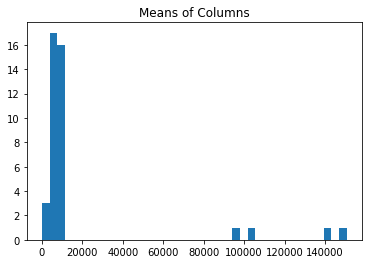

Reporter intensity corrected 0 MS3_1      8756.701218
Reporter intensity corrected 1 MS3_1      8242.912746
Reporter intensity corrected 2 MS3_1      8045.347016
Reporter intensity corrected 3 MS3_1      8175.134893
Reporter intensity corrected 4 MS3_1      8716.591123
Reporter intensity corrected 5 MS3_1      8854.583496
Reporter intensity corrected 6 MS3_1      8353.158014
Reporter intensity corrected 7 MS3_1       253.831929
Reporter intensity corrected 8 MS3_1      8069.454537
Reporter intensity corrected 9 MS3_1    150566.664798
Reporter intensity corrected 0 MS3_2      6781.660362
Reporter intensity corrected 1 MS3_2      6500.994743
Reporter intensity corrected 2 MS3_2      6247.221494
Reporter intensity corrected 3 MS3_2      6327.837091
Reporter intensity corrected 4 MS3_2      6718.135070
Reporter intensity corrected 5 MS3_2      6534.780408
Reporter intensity corrected 6 MS3_2      6170.567332
Reporter intensity corrected 7 MS3_2       225.537954
Reporter intensity corrected

In [14]:
means_of_nonZero_by_col = ms3data.apply(skipZeroMean, axis='index')
plt.hist(means_of_nonZero_by_col, bins=40)
plt.title("Means of Columns")
plt.show()
print(means_of_nonZero_by_col)

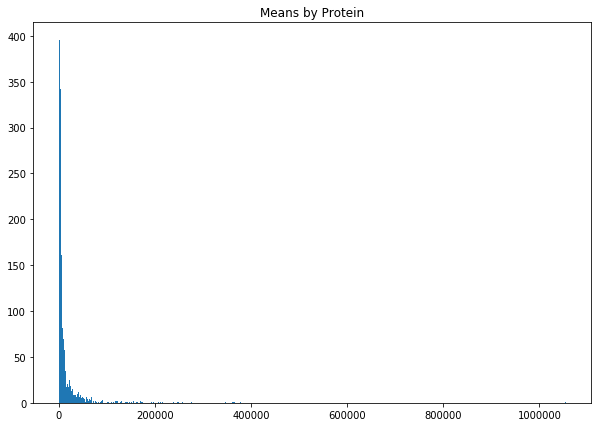

Note that there are 57 zeros shown, out of a dataset of 1436.


In [15]:
means_of_nonZero_by_row = ms3data.apply(skipZeroMean, axis='columns')
plt.figure(figsize=(10,7))
plt.hist(means_of_nonZero_by_row, bins=500)
plt.title("Means by Protein")
plt.show()


print ("Note that there are %i zeros shown, out of a dataset of %i." % 
       (len([z for z in means_of_nonZero_by_row if (z==0)]), len(means_of_nonZero_by_row)))

# Finding Technical Replicates

In [16]:
differences = {}
for i in range(0,20): #The data is four sets of ten columns
    diff_c = {} #differences for this column
    selfser = ms3data.iloc[:,i]
    for o in range(0,40):
        oser = ms3data.iloc[:,o]
        dif = compare(selfser, oser)
        diff_c[o] = dif
    differences[i] = diff_c

In [17]:
differences = pd.DataFrame.from_dict(differences, dtype = float)

In [18]:
v =(differences.apply(get_lower, to_show=10))

0        0.000000
20     324.415397
22     572.345857
1      596.344464
2      616.147465
21     792.694269
28    2665.777765
8     2676.276880
10    2730.039930
6     2779.496490
Name: 0, dtype: float64 


1        0.000000
21     316.755390
20     493.518120
22     503.055334
2      518.921121
0      596.344464
28    2546.508844
10    2555.439269
8     2559.647221
30    2601.950334
Name: 1, dtype: float64 


2        0.000000
22      70.385982
20     513.259589
1      518.921121
21     556.979547
0      616.147465
10    2543.080418
28    2590.052862
30    2597.460787
8     2609.235209
Name: 2, dtype: float64 


3        0.000000
23     202.993893
4      702.760421
5      730.983237
24     749.855766
25     780.300013
14    2707.089593
34    2722.006978
33    2739.350279
13    2744.235587
Name: 3, dtype: float64 


4        0.000000
24     213.665281
25     540.145623
5      555.384781
3      702.760421
23     704.838799
14    2982.572437
34    2994.559147
35    3024.470928
15    3053

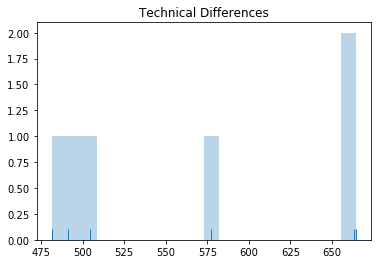

[577.1376833797585, 663.0428129062213, 664.559707520891, 504.43732126276706, 481.4455232126272, 491.33220891364954]


In [19]:
technical_replicates = ([0,1,2],[3,4,5],[6,8],[10,11,12],[13,14,15],[16,18])

tech_dif = []
for sample in technical_replicates:
    sample_dif = []
    for i in sample:
        for x in sample:
            if i != x:
                sample_dif.append(differences[i][x])
    sample_dif =skipZeroMean(sample_dif)
    tech_dif.append(sample_dif)

plt.hist(tech_dif, alpha=.3, bins = 20)
plt.title("Technical Differences")
sns.rugplot(tech_dif)
plt.show()
print(tech_dif)

# Technical Variances

The sets defined at the top are most similar, as calculated above.

Currently ignoring the uncorrected measurments.

In [20]:
technical_replicates = {
    "Cell Line 1":[0,1,2],
    "Cell Line 2":[3,4,5],
    "Cell Line 3":[6,8],
    
    "Cell Line 4":[10,11,12],
    "Cell Line 5":[13,14,15],
    "Cell Line 6":[16,18]
}

ms3Samples = {}

technical_variances = []
tech_variance_rate = []
sample_aves = {}

for sample in technical_replicates:
    #
    reps = {}
    sample_proteins = {}
    for rep in technical_replicates[sample]:
        reps[ms3data.iloc[:,rep].name] = ms3data.iloc[:,rep]
    ms3Samples[sample] = pd.DataFrame.from_dict(reps, dtype = float)
        
    for r in range(0, len(list(reps.values())[0])):
        #reps = (f[r], s[r], t[r])
        rep_for_protein = []
        p = ms3data.iloc[r].name
        for rep in reps.values():
            if rep[r] > 0: rep_for_protein.append(rep[r])
            
        if len(rep_for_protein) > 1: 
            v = variance(rep_for_protein)
            technical_variances.append(v)
            tech_variance_rate.append((v/mean(rep_for_protein)))
            sample_proteins[p] = mean(rep_for_protein)
        else: 
            technical_variances.append(0)
            tech_variance_rate.append(0)
            sample_proteins[p] = 0.0
    sample_aves[sample] = sample_proteins
sample_aves = pd.DataFrame.from_dict(sample_aves, dtype = float)

In [21]:
#print (ms3Samples["Cell Line 1"])

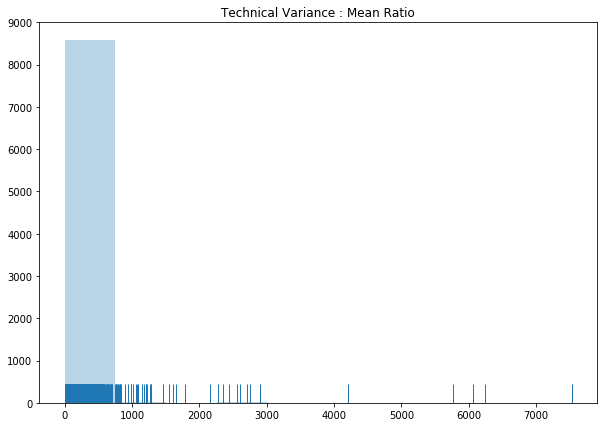

In [22]:
plt.figure(figsize=(10,7))
plt.hist(tech_variance_rate, alpha=.3)
plt.title("Technical Variance : Mean Ratio")
sns.rugplot(tech_variance_rate)
plt.show()

In [23]:
technical_variances = sorted(technical_variances, reverse=True)
print ("Technical Variances Calculated:",len(technical_variances))
print ("Greatest Technical Variance:", technical_variances[0])
tech_variance_rate = sorted(tech_variance_rate, reverse=True)
print ("Greatest Technical Variance: Mean Ratio:", tech_variance_rate[0])

Technical Variances Calculated: 8616
Greatest Technical Variance: 6959640200.0
Greatest Technical Variance: Mean Ratio: 7534.932279543117


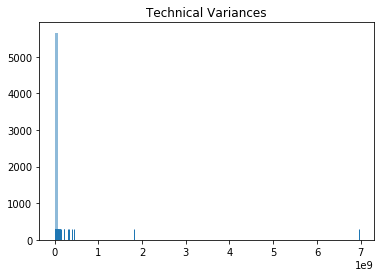

Note that 2935 zeros are not shown, out of a dataset of 8616.


In [24]:
plt.hist(skipZero(technical_variances), alpha=.5, bins = 100)
sns.rugplot(technical_variances)
plt.title("Technical Variances")
plt.show()

print ("Note that %i zeros are not shown, out of a dataset of %i." % 
       (len([z for z in technical_variances if (z==0)]), len(technical_variances)))

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


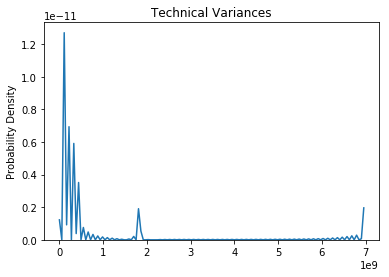

In [25]:
tv_plt = sns.kdeplot(data=technical_variances)
plt.title("Technical Variances")
tv_plt.set(xlabel="", ylabel ="Probability Density")
plt.show()

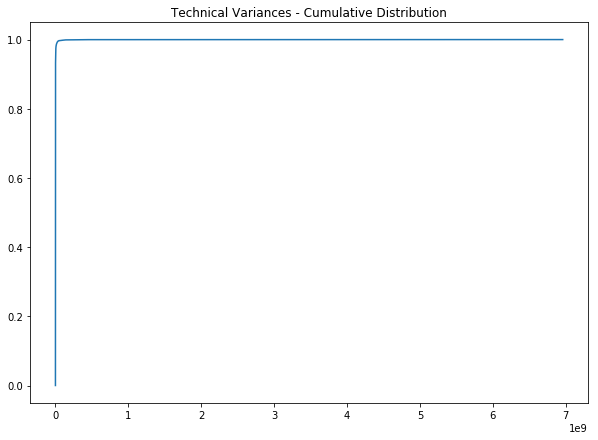

In [26]:
technical_variances = sorted(technical_variances, reverse = True)

x= np.sort(technical_variances)
plt.figure(figsize=(10,7))
plt.plot(x, np.arange(len(x))/float(len(x)))
plt.title("Technical Variances - Cumulative Distribution")
plt.show()

Including Zeros: 
95% threshold:  2346854.3333333335
99% threshold:  17592656.333333332

Ignoring Zeros: 
95% threshold:  4199116.333333333
99% threshold:  27726400.0


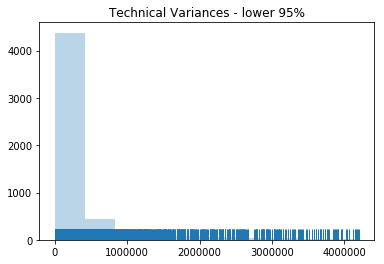

Note that 2935 zeros are not shown, out of a dataset of 8616.


In [27]:
#calculate 95% threshold
get_thresholds(technical_variances)

non_zero_tech_var = skipZero(technical_variances)
threshold_index = math.ceil(float(len(non_zero_tech_var))*0.05)

x= np.sort(non_zero_tech_var[threshold_index:])
plt.hist(x, alpha=.3)
sns.rugplot(x)
plt.title("Technical Variances - lower 95%")
plt.show()

print ("Note that %i zeros are not shown, out of a dataset of %i." % 
       (len([z for z in technical_variances if (z==0)]), len(technical_variances)))

# Variance Between Cell Lines


    for r in range(0, len(list(reps.values())[0])):
        #reps = (f[r], s[r], t[r])
        rep_for_protein = []
        p = ms3data.iloc[r].name
        for rep in reps.values():
            if rep[r] > 0: rep_for_protein.append(rep[r])
            
        if len(rep_for_protein) > 1: 
            v = variance(rep_for_protein)
            technical_variances.append(v)
            tech_variance_rate.append((v/mean(rep_for_protein)))
            sample_proteins[p] = mean(rep_for_protein)
        else: 
            technical_variances.append(0)
            tech_variance_rate.append(0)
            sample_proteins[p] = 0.0

In [28]:
sample_names = []
for i in sample_aves:
    sample_names.append(i)

In [51]:
#Shows the lines that will be compared
if False:
    for i in range(0,len(sample_names)-1):
        for o_ser_index in range(i+1,len(sample_names)):
            print (sample_names[i], '   vs   ', sample_names[o_ser_index])
        print ()

In [30]:
h = ms3data.shape[0]
variances = {}
var_flat = np.empty(shape = (h*15))
variance_rate = {}
flat_index = 0

for ser_index in range(0,len(sample_names)-1): #these are the keys to ms3Samples
    ser = sample_names[ser_index]
    sample_df1 = ms3Samples[ser]
    variances[ser] = {}
    for o_ser_index in range(ser_index+1,len(sample_names)): #keys again
        o_ser = sample_names[o_ser_index]
        #compare variance in sample versus otherSample
        sample_df2 = ms3Samples[o_ser]
        variances[ser][o_ser] = {}
        for protein in sample_df1.index:
            t = list(sample_df1.loc[protein,:])
            for i in sample_df2.loc[protein,:]:
                t.append(i)
            v = variance(t)
            variances[ser][o_ser][protein] = v
            var_flat[flat_index]=v
            flat_index +=1
        
print(flat_index)
        #"""# For tests involving the full sets



21540


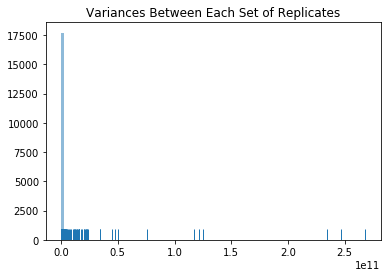

Note that 3783 zeros are not shown, out of a dataset of 21540.
Including Zeros: 
95% threshold:  51941008.93926667
99% threshold:  519894732.07799995

Ignoring Zeros: 
95% threshold:  68819258.8
99% threshold:  690190816.93702


In [31]:
plt.hist(skipZero(var_flat), alpha=.5, bins = 100)
sns.rugplot(skipZero(var_flat))
plt.title("Variances Between Each Set of Replicates")
plt.show()

print ("Note that %i zeros are not shown, out of a dataset of %i." % 
       (len([z for z in var_flat if (z==0)]), len(var_flat)))

variances_threshold = get_thresholds(var_flat)

In [32]:
variance_outliers = []
for line1 in variances:
    compare_dict = variances[line1]
    for line2 in compare_dict:
        values = compare_dict[line2]
        for protein in values:
            val = values[protein]
            if val > variances_threshold:
                id_label =(line1+" "+line2+" "+protein)
                variance_outliers.append((line1, line2, protein, val))
variance_outliers.sort(key=operator.itemgetter(3), reverse=True)

These are the top 5% by variance. The H2B... set marked extremely high on intensity and on every measure since, with the exception of the weighted standard deviation, where it was still high, but close to the rest of the dataset.

In [50]:
SHOW_ALL_OUTLIERS=False
if SHOW_ALL_OUTLIERS:
    for i in (variance_outliers): print(i[0], i[1], i[2], i[3])

Now I compare lines and proteins to see which make the outlier set most.

In [34]:
line_category_counts = {}#Example key = "Cell Line1 vs Cell line 2" value = number of occurances
line_categories = {}
protein_categories = {} #Name:Frequency
for entry in variance_outliers:
    line_category = (entry[0]+" vs "+entry[1])
    if line_category in line_categories:
        line_category_counts[line_category] += 1
        line_categories[line_category] += entry[3]
    else: 
        line_category_counts[line_category] = 1
        line_categories[line_category] = entry[3]
    
    protein = entry[2]
    if protein in protein_categories: protein_categories[protein] += 1
    else: protein_categories[protein] = 1

In [52]:
line_categories_list = []
for i in (line_categories): line_categories_list.append((i,line_categories[i]))

line_categories_list.sort(key=operator.itemgetter(1), reverse=True)
if SHOW_ALL_OUTLIERS:
    for i in (line_categories_list): print(i[0]+":",i[1])

In [53]:
line_categories_count_list = []
for i in (line_category_counts): line_categories_count_list.append((i,line_category_counts[i]))

line_categories_count_list.sort(key=operator.itemgetter(1), reverse=True)
if SHOW_ALL_OUTLIERS:
    for i in (line_categories_count_list): print(i[0]+":",i[1])

In [55]:
line_categories_count_aves = []
for i in (line_category_counts): line_categories_count_aves.append((i,(line_categories[i]/float(line_category_counts[i]))))

line_categories_count_aves.sort(key=operator.itemgetter(1), reverse=True)
if SHOW_ALL_OUTLIERS:
    for i in (line_categories_count_aves): print(i[0]+":",i[1])

In [56]:
if SHOW_ALL_OUTLIERS:
    print ("There are %i proteins that made the outlier list.\n" % len(protein_categories))
    for i in (protein_categories): print(i+":",protein_categories[i])

In [57]:
if SHOW_ALL_OUTLIERS:
    plt.figure(figsize=(40,10))
    plt.bar(range(len(protein_categories)), list(protein_categories.values()), align='center')
    plt.xticks(range(len(protein_categories)), list(protein_categories.keys()), rotation="vertical")
    plt.title("Variance Outliers By Cell Lines")
    plt.show()

In [40]:
dif = {}
for ser in sample_aves:
    series = sample_aves[ser]
    dif[ser]={}
    for o_ser in sample_aves:
        other_series = sample_aves[o_ser]
        dif[ser][o_ser] = compare(series, other_series)
    

In [58]:
if SHOW_ALL_OUTLIERS:
    print ("Average Intensity Differences Between Cell Lines:\n")
    dif = pd.DataFrame.from_dict(dif, dtype = float)
    v =(dif.apply(get_lower, to_show=6))

 # By-Protein Standard Deviations
 ## All Data

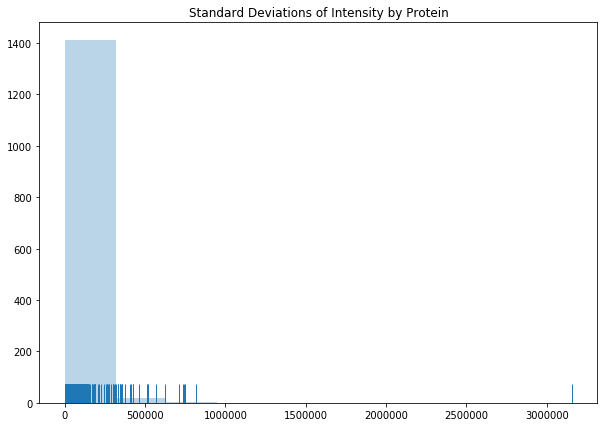

In [42]:
def skipZeroStDev(list):
    temp_list = []
    for i in list:
        if i > 0:
            temp_list.append(i)
    if len(temp_list) < 2: return 0
    else: return stdev(temp_list)

stdevs_rows = ms3data.apply(skipZeroStDev, axis = 'columns')
#iterate columns to get data for each row
stdevs_cols = ms3data.apply(skipZeroStDev, axis = 'index')
plt.figure(figsize=(10,7))
plt.hist(stdevs_rows, alpha=.3)
plt.title("Standard Deviations of Intensity by Protein")
sns.rugplot(stdevs_rows)
plt.show()

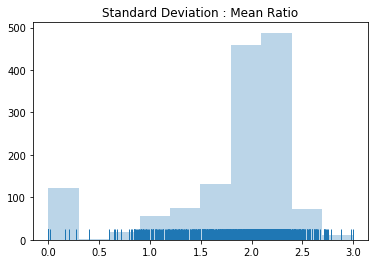

95% threshold:  2.418423256113018
99% threshold:  2.6379908104156002


In [43]:
def weightedStDev(list):
    temp_list = []
    for i in list:
        if i > 0:
            temp_list.append(i)
    if len(temp_list) < 2: return 0
    else: return stdev(temp_list)/mean(temp_list)

sdm_rows = ms3data.apply(weightedStDev, axis = "columns")

plt.hist(sdm_rows, alpha=.3)
plt.title("Standard Deviation : Mean Ratio")
sns.rugplot(sdm_rows)
plt.show()

sdm_rows.sort_values(ascending=False, inplace=True)

print("95% threshold: ", sdm_rows[math.ceil(float(len(stdevs_rows))*.05)])
print("99% threshold: ", sdm_rows[math.ceil(float(len(stdevs_rows))*.01)])
#print("\n",sdm_rows.head())

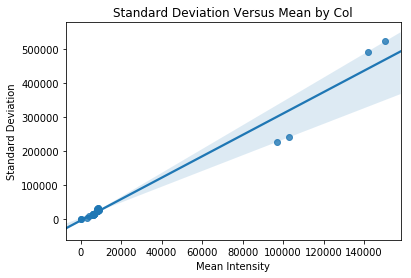

In [44]:
sd_m = sns.regplot(x = means_of_nonZero_by_col,y = stdevs_cols)
sd_m.set(title="Standard Deviation Versus Mean by Col", xlabel="Mean Intensity", ylabel="Standard Deviation")

plt.show()

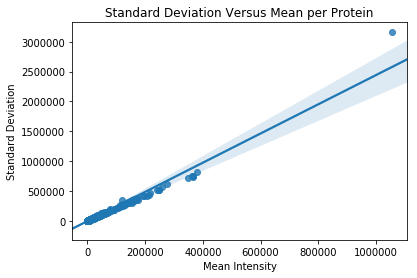

In [45]:
sd_m = sns.regplot(x = means_of_nonZero_by_row,y = stdevs_rows)
sd_m.set(title="Standard Deviation Versus Mean per Protein", xlabel="Mean Intensity", ylabel="Standard Deviation")

plt.show()

# Standard Deviation Within Technical Replicates

In [62]:
tech_deviations = {}
tech_means = {}

for sample in technical_replicates:
    cell_line = str(sample)
    tech_means_line = {}
    tech_dev_line = {}
    #calculate standard deviations by protein by sample
    reps = []
    for rep in technical_replicates[sample]:
        reps.append(ms3data.iloc[:,rep])
        
    protein_names = ms3data.index
     
    for i in range(0, len(reps[0])):
        protein_vals = []
        protein = protein_names[i]        
        for rep in reps:
            protein_vals.append(rep[i])
        tech_dev_line[protein] = skipZeroStDev(protein_vals)
        tech_means_line[protein] = skipZeroMean(protein_vals)
    tech_deviations[cell_line] = tech_dev_line
    tech_means[cell_line] = tech_means_line
       
tech_deviations = pd.DataFrame.from_dict(tech_deviations, dtype = float)
tech_means = pd.DataFrame.from_dict(tech_means, dtype = float)


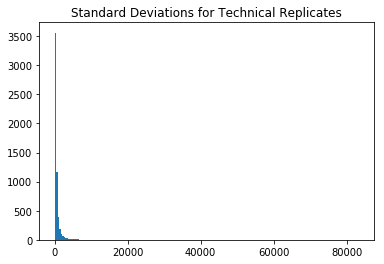

In [63]:
#plot tecnical replicate standard deviations as histogram
tech_deviations_flat = -np.sort(-tech_deviations.values.flatten())
plt.hist(skipZero(tech_deviations_flat), bins=200)
plt.title("Standard Deviations for Technical Replicates")
plt.show()

In [64]:
get_thresholds(tech_deviations_flat)

Including Zeros: 
95% threshold:  1531.944624760743
99% threshold:  4194.360062433045

Ignoring Zeros: 
95% threshold:  2049.174549259612
99% threshold:  5265.586387098781


2049.174549259612

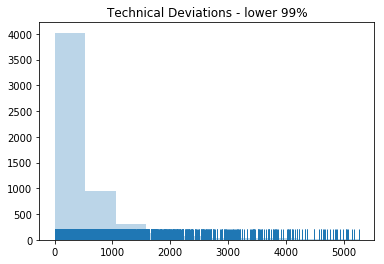

Note that 2935 zeros are not shown, out of a dataset of 8616.


In [65]:
x = skipZero(tech_deviations_flat)
x = x[math.ceil(float(len(x))*.01):]
plt.hist(x, alpha=.3, )
sns.rugplot(x)
plt.title("Technical Deviations - lower 99%")
plt.show()
print ("Note that %i zeros are not shown, out of a dataset of %i." % 
       (len([z for z in tech_deviations_flat if (z==0)]), len(tech_deviations_flat)))

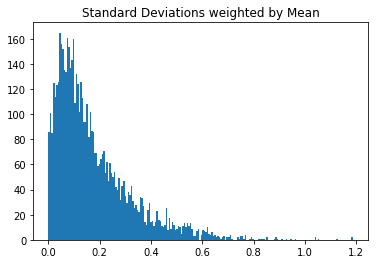

Note that 2935 zeros are not shown, out of a dataset of 8616.


In [66]:
dev_div_mean = (tech_deviations/tech_means)
ddm_flat = sorted(dev_div_mean.fillna(0).values.flatten(), reverse=True)

plt.hist([x for x in ddm_flat if (x>0)], bins=200)
plt.title("Standard Deviations weighted by Mean")
plt.show()
print ("Note that %i zeros are not shown, out of a dataset of %i." % (len([x for x in ddm_flat if (x==0)]), len(ddm_flat)))

In [67]:
ddm_flat = sorted(dev_div_mean.fillna(0).values.flatten(), reverse=True)
get_thresholds(ddm_flat)

Including Zeros: 
95% threshold:  0.42202843744097457
99% threshold:  0.6196038423619303

Ignoring Zeros: 
95% threshold:  0.4821333180463669
99% threshold:  0.659621766643641


0.4821333180463669

# Standard Deviations Between Cell Lines
#### ( Not implemented)